In [1]:
from config import DBNAME
import pandas as pd 
import numpy as np
from tqdm import tqdm
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import sqlite3 

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
# ====================
# БАЗОВЫЕ НАСТРОЙКИ
# ====================
plt.rcParams.update({
    # Размер и разрешение
    'figure.figsize': (10, 6),  # Ширина, высота в дюймах
    'figure.dpi': 100,          # Разрешение для экранов
    'savefig.dpi': 300,         # Разрешение для сохранения
    
    # Шрифты и текст
    'font.size': 12,
    'font.family': 'DejaVu Sans',  # Кроссплатформенный шрифт
    'axes.titlesize': 16,          # Заголовок графика
    'axes.labelsize': 14,          # Подписи осей
    'xtick.labelsize': 12,         # Метки оси X
    'ytick.labelsize': 12,         # Метки оси Y
    'legend.fontsize': 11,         # Легенда
    
    # Цвета и линии
    'axes.facecolor': 'white',     # Фон графика
    'figure.facecolor': 'white',   # Фон фигуры
    'axes.edgecolor': 'black',     # Цвет рамки
    'grid.color': '#e0e0e0',       # Цвет сетки
    
    # Оси и сетка
    'axes.grid': True,             # Отображать сетку
    'grid.linestyle': '--',        # Стиль сетки
    'grid.alpha': 0.7,             # Прозрачность сетки
    
    # Легенда
    'legend.frameon': True,        # Рамка вокруг легенды
    'legend.framealpha': 0.9,      # Прозрачность фона
    'legend.edgecolor': 'black',
    
    # Линии
    'lines.linewidth': 2,          # Толщина линий
    'lines.markersize': 8,         # Размер маркеров
    
    # Гистограммы
    'hist.bins': 'auto',           # Автовыбор корзин для гистограмм
})

In [4]:
TABLE_NAME = DBNAME

In [5]:
try:
    with sqlite3.connect(DBNAME) as conn:
        hh_df = pd.read_sql_query(f"SELECT * FROM full_sql", conn)
except Exception as e:
    print(f'❌ Ошибка: Загрузка данных из БД {e}')

In [6]:
hh_df.published_at = pd.to_datetime(hh_df.published_at)

In [25]:
hh_df.query('city=="Минск"')

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
41,116842265,Системный аналитик 1С,Middle,Минск,"[53.91574, 27.485393]","[53.9024716, 27.5618225]",2025-07-07 12:28:05+03:00,0,139899,Полная занятость,"Минск, Матусевича, 20",0,1,79663.0,NaN,RUR,0,За месяц,,"Программист, разработчик",Удаленная работа,,0,От 1 года до 3 лет,1С программирование; Бизнес-анализ; Постановка...,0,https://hh.ru/vacancy/116842265,Системный аналитик,2025-07-07
156,120168075,Системный аналитик (WMS- системы),Middle,Минск,"[53.873516, 27.416178]","[53.9024716, 27.5618225]",2025-06-27 12:08:04+03:00,0,753017,Полная занятость,"Минск, улица Монтажников, 2",0,1,92409.0,NaN,RUR,1,За месяц,,Системный аналитик,Полный день,,0,От 1 года до 3 лет,,0,https://hh.ru/vacancy/120168075,Системный аналитик,2025-06-27
222,120911993,Бизнес-аналитик,Middle,Минск,"[53.906358, 27.516799]","[53.9024716, 27.5618225]",2025-07-02 09:26:44+03:00,0,1059604,Полная занятость,"Минск, Пинская улица, 28А",0,1,46205.0,NaN,RUR,1,За месяц,,Бизнес-аналитик,Полный день,,0,От 1 года до 3 лет,коммуникабельность; обучение; стрессоустойчивость,0,https://hh.ru/vacancy/120911993,Бизнес-аналитик,2025-07-02
268,121157708,Бизнес-аналитик 1С,Middle,Минск,"[53.918344, 27.531396]","[53.9024716, 27.5618225]",2025-06-29 10:25:52+03:00,0,991813,Полная занятость,"Минск, проспект Победителей, 51к2",0,1,66514.0,NaN,RUR,0,За месяц,,Аналитик,Удаленная работа,,0,От 1 года до 3 лет,Разработка инструкций; ERP-системы на базе 1С;...,0,https://hh.ru/vacancy/121157708,Бизнес-аналитик,2025-06-29
466,121752057,Бизнес-аналитик Битрикс24 / Интегратор Битрикс24,Middle,Минск,"[53.9024716, 27.5618225]","[53.9024716, 27.5618225]",2025-06-17 17:26:26+03:00,0,4335585,Полная занятость,,0,1,53109.0,106218.0,RUR,0,За месяц,,Бизнес-аналитик,Полный день,,0,От 1 года до 3 лет,Автоматизация бизнес-процессов; Анализ бизнес-...,0,https://hh.ru/vacancy/121752057,Бизнес-аналитик,2025-06-17
494,121782394,Системный аналитик (ученик),Middle,Минск,"[53.9024716, 27.5618225]","[53.9024716, 27.5618225]",2025-06-18 12:05:32+03:00,0,6093775,Полная занятость,,1,1,47477.0,54259.0,RUR,1,За месяц,,Системный аналитик,Удаленная работа,,0,Нет опыта,Системный анализ; Бизнес-анализ; BPMN; UML; SQ...,0,https://hh.ru/vacancy/121782394,Системный аналитик,2025-06-18
518,121801832,Разработчик / Аналитик BI QlikView (QlikSense),Middle,Минск,"[53.9077, 27.549731]","[53.9024716, 27.5618225]",2025-07-08 10:21:05+03:00,0,3222085,Полная занятость,"Минск, проспект Победителей, 7А",0,1,92940.0,199158.0,RUR,0,За месяц,,"BI-аналитик, аналитик данных",Полный день,,0,От 3 до 6 лет,коммуникабельность; коммуникация; обучение,0,https://hh.ru/vacancy/121801832,BI аналитик,2025-07-08
574,121854680,SCADA Control Systems Software Developer,Middle,Минск,"[53.9024716, 27.5618225]","[53.9024716, 27.5618225]",2025-06-19 17:50:01+03:00,0,10301157,Полная занятость,,0,1,156371.0,234557.0,RUR,0,За месяц,,Дата-сайентист,Удаленная работа,,0,От 3 до 6 лет,LabVIEW; Python; Java; SQL; HTML5; CSS; JavaSc...,0,https://hh.ru/vacancy/121854680,Дата-сайентист,2025-06-19
594,121873590,Бизнес аналитик / специалист по внедрению CRM,Middle,Минск,"[53.891614, 27.527435]","[53.9024716, 27.5618225]",2025-06-20 10:16:56+03:00,0,3189689,Полная занятость,"Минск, проспект Дзержинского, 3Б",0,1,39939.0,79879.0,RUR,0,За месяц,,Бизнес-аналитик,Полный день,,0,Нет опыта,Аналитическое мышление; Анализ бизнес-процессо...,0,https://hh.ru/vacancy/121873590,Бизнес-аналитик,2025-06-20
645,121932909,Бизнес-аналитик 1С,Middle,Минск,"[53.9024716, 27.5618225]","[53.9024716, 27.5618225]",2025-06-23 10:07:36+03:00,0,9994043,Полная занятость,,0,1,53211.0,79817.0,RUR,0,За месяц,,Аналитик,Полный день,,0,От 1 года до 3 лет,Бизнес-анализ; Анализ бизнес-процессов; 1С: Бу...,0,https://hh.ru

In [8]:
hh_df.salary_from.describe()


count       1502.000000
mean      121163.543715
std        75696.911847
min           70.000000
25%        69600.000000
50%       100000.000000
75%       152250.000000
max      1000000.000000
Name: salary_from, dtype: float64

In [9]:
def capture_figures(title=None, xlabel=None, ylabel=None):
    plt.title(title) if title else plt.title('')
    plt.xlabel(xlabel) if xlabel else plt.xlabel('')
    plt.ylabel(ylabel) if ylabel else plt.ylabel('')
    plt.show()

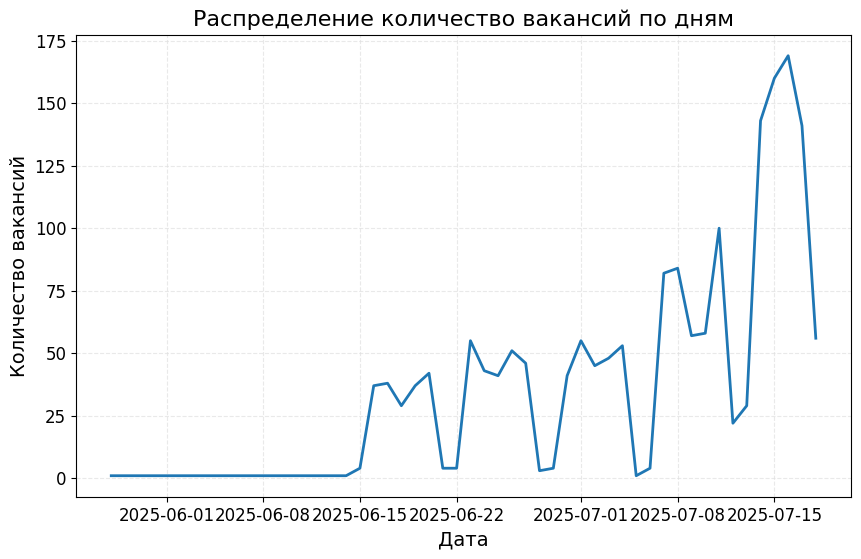

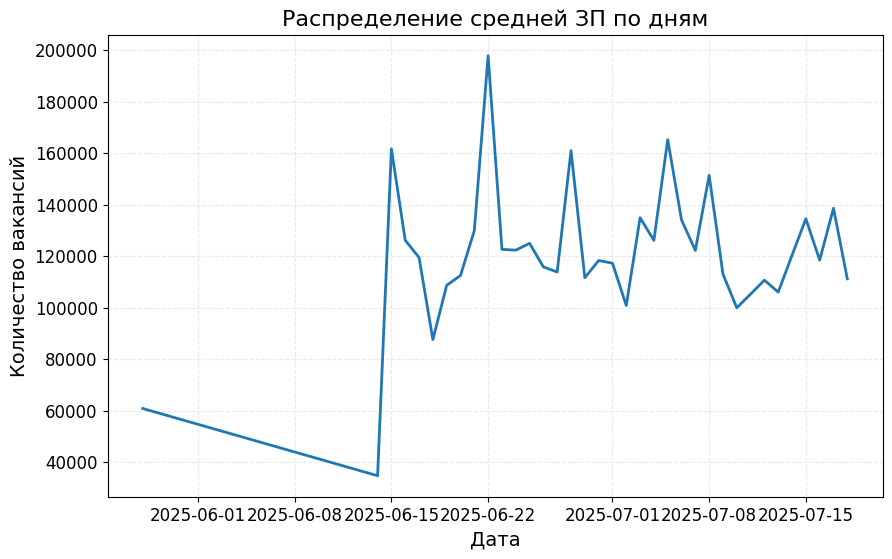

In [10]:
hh_df['j_date'] = hh_df.published_at.dt.date

temp = hh_df.groupby(['j_date']).agg(
    vac_count = ('vac_id','nunique'),
    mean_salary = ('salary_from','mean')
).reset_index().sort_values(by='j_date')


sns.lineplot(data=temp, x='j_date', y='vac_count')
capture_figures('Распределение количество вакансий по дням', 'Дата','Количество вакансий')

sns.lineplot(data=temp, x='j_date', y='mean_salary')
capture_figures('Распределение средней ЗП по дням', 'Дата','Количество вакансий')


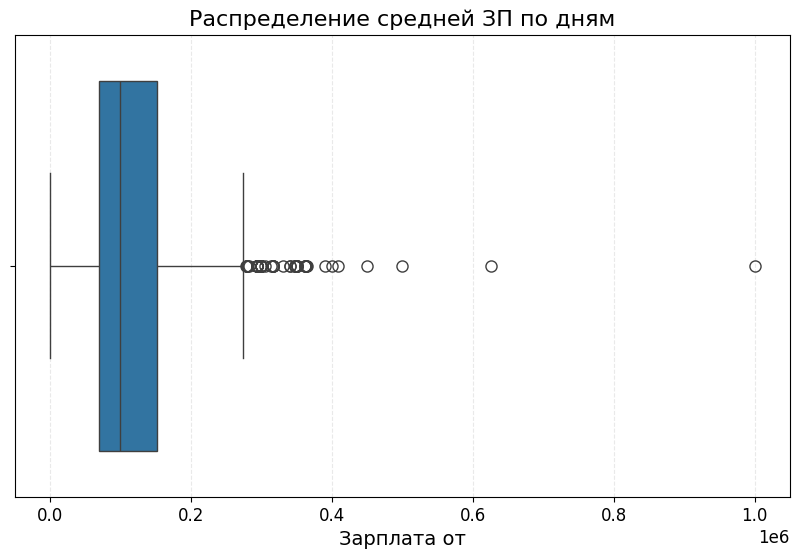

In [11]:
sns.boxplot(data = hh_df, x='salary_from')
capture_figures('Распределение средней ЗП по дням', xlabel='Зарплата от')

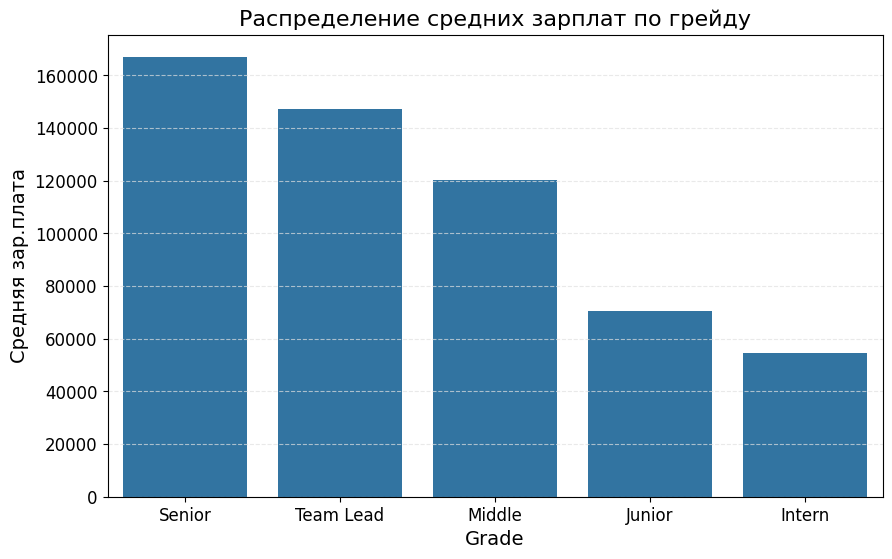

In [12]:
grade_salary = hh_df.groupby(['grade']).agg(
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
).reset_index().sort_values(by='mean_salary', ascending=False)


sns.barplot(data=grade_salary, y='mean_salary', x='grade')
capture_figures('Распределение средних зарплат по грейду', ylabel='Средняя зар.плата', xlabel='Grade')

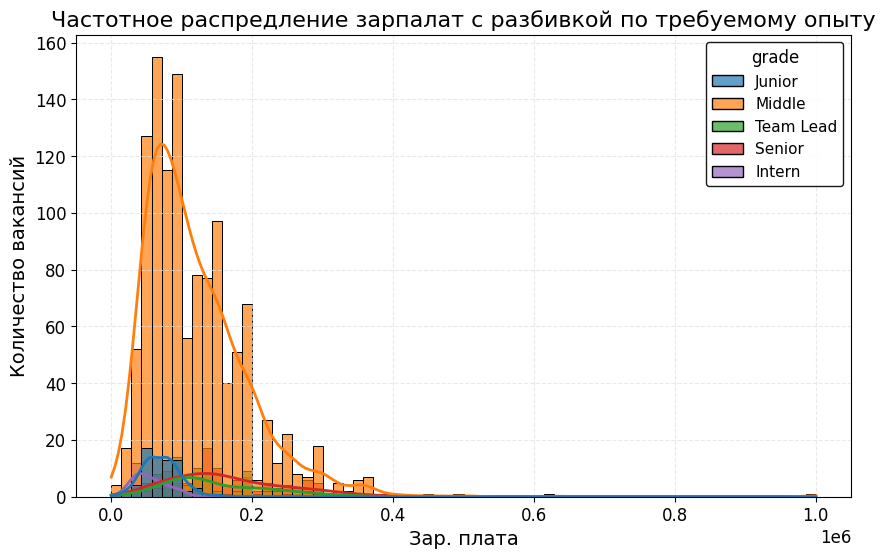

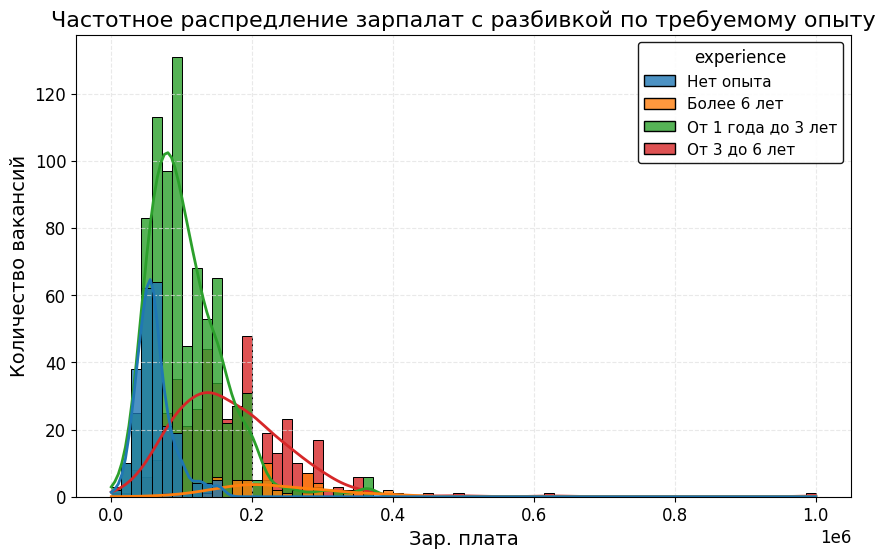

In [13]:
sns.histplot(data=hh_df, x='salary_from', hue='grade', kde=True,  alpha=0.7)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')
sns.histplot(data=hh_df, x='salary_from', hue='experience', kde=True, alpha=0.8)
capture_figures('Частотное распредление зарпалат с разбивкой по требуемому опыту', ylabel='Количество вакансий',xlabel='Зар. плата')

In [14]:
hh_df.sample(1)

,vac_id,vac_name,grade,city,geo,geo_city,published_at,archived,employer_id,emp_name,addres,is_accredited,is_trusted,salary_from,salary_to,currency,gross,mode_name,frequency,prof_role,schedule_name,insider_interview,response_letter_required,experience,key_skills,has_test,url,parsed_for_job,j_date
594,121873590,Бизнес аналитик / специалист по внедрению CRM,Middle,Минск,"[53.891614, 27.527435]","[53.9024716, 27.5618225]",2025-06-20 10:16:56+03:00,0,3189689,Полная занятость,"Минск, проспект Дзержинского, 3Б",0,1,39939.0,79879.0,RUR,0,За месяц,,Бизнес-аналитик,Полный день,,0,Нет опыта,Аналитическое мышление; Анализ бизнес-процессо...,0,https://hh.ru/vacancy/121873590,Бизнес-аналитик,2025-06-20


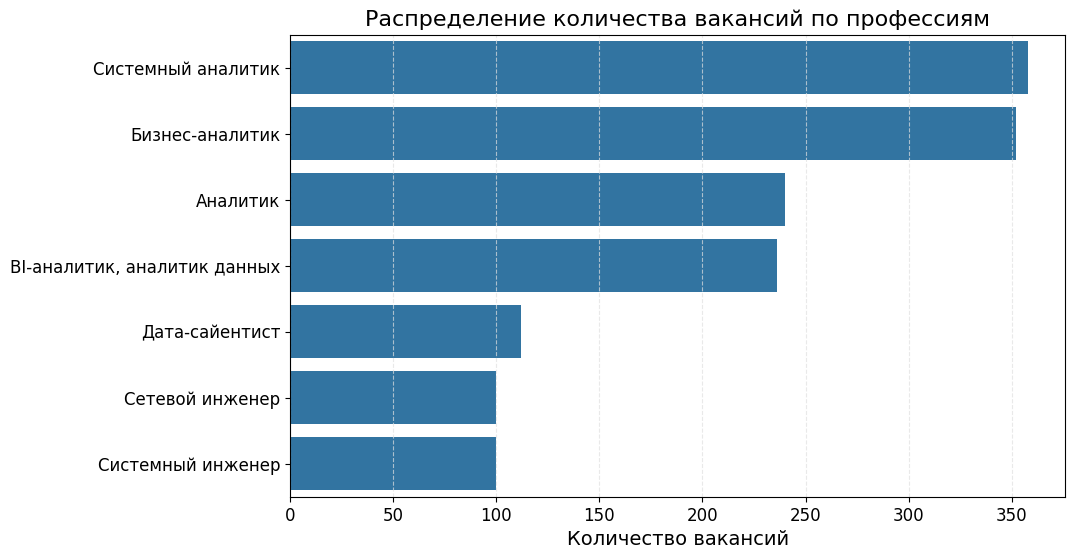

In [15]:
prof_role_salary = hh_df.groupby('prof_role').agg(
    vac_count = ('vac_id','count'),
    mean_salary = ('salary_from','mean'),
    median_salary = ('salary_from','median')
    ).reset_index().sort_values(by='vac_count', ascending=False).head(7)

sns.barplot(data=prof_role_salary, y='prof_role', x='vac_count' , orient='h')
capture_figures('Распределение количества вакансий по профессиям', xlabel='Количество вакансий')

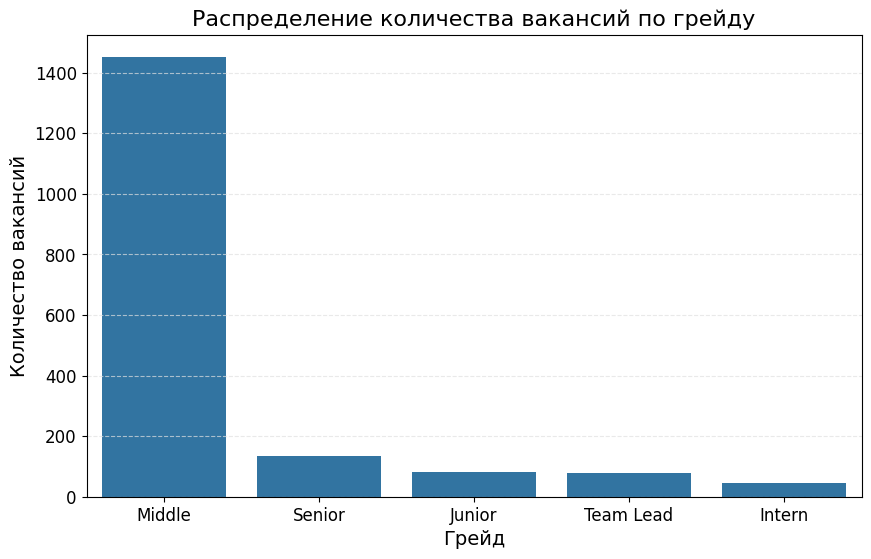

In [16]:
grade_salary = hh_df.groupby(['grade']).agg(
    vac_cnt = ('vac_id','count') ).reset_index().sort_values(by='vac_cnt', ascending=False)

sns.barplot(data=grade_salary, x='grade', y='vac_cnt')
capture_figures('Распределение количества вакансий по грейду', ylabel='Количество вакансий', xlabel='Грейд')

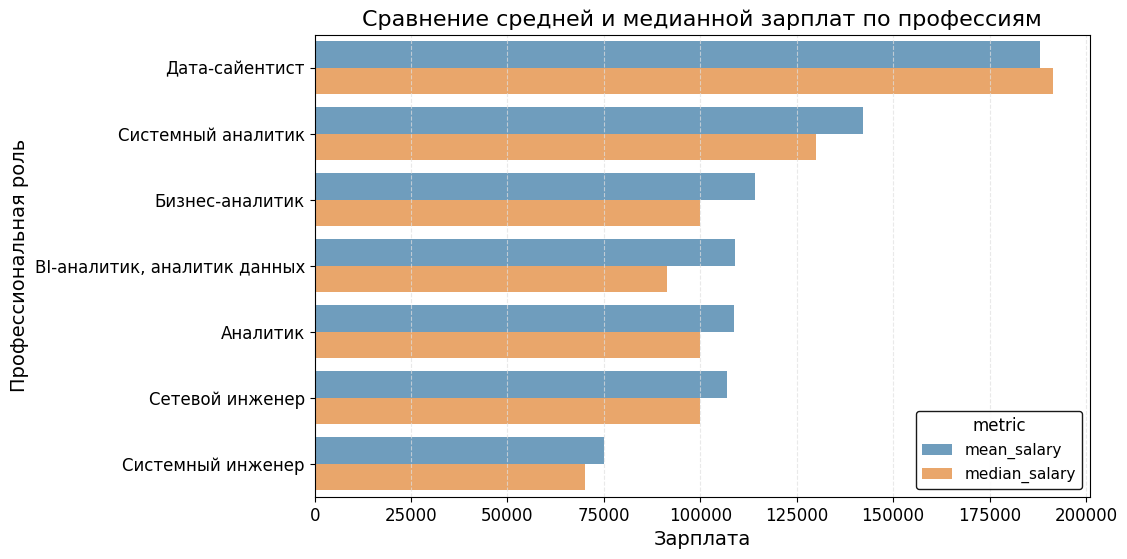

In [17]:
# Преобразуем данные в длинный формат
melted = prof_role_salary.melt(
    id_vars=['prof_role'], 
    value_vars=['mean_salary', 'median_salary'],
    var_name='metric',
    value_name='salary_value'
)

# Сортируем по средней зарплате (сохраняем порядок)
prof_role_order = prof_role_salary.sort_values('mean_salary', ascending=False)['prof_role']
melted['prof_role'] = pd.Categorical(melted['prof_role'], categories=prof_role_order, ordered=True)

sns.barplot(data=melted,y='prof_role', x='salary_value', hue='metric', orient='h', alpha=0.7, palette=['#1f77b4', '#ff7f0e'])

capture_figures(
    'Сравнение средней и медианной зарплат по профессиям', 
    xlabel='Зарплата', 
    ylabel='Профессиональная роль')


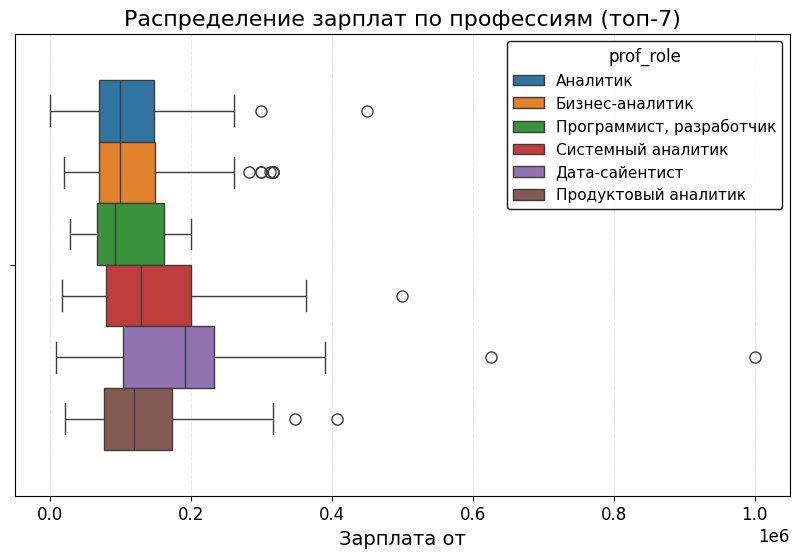

In [18]:
p_role = ['Дата-сайентист',
'Продуктовый аналитик',
'Системный аналитик',
'Бизнес-аналитик',
'Программист, разработчик',
'Аналитик',
'BI-аналитик',
'аналитик данных']

sns.boxplot(data=hh_df[hh_df['prof_role'].isin(p_role)], x='salary_from', hue='prof_role')
capture_figures('Распределение зарплат по профессиям (топ-7)', xlabel='Зарплата от')

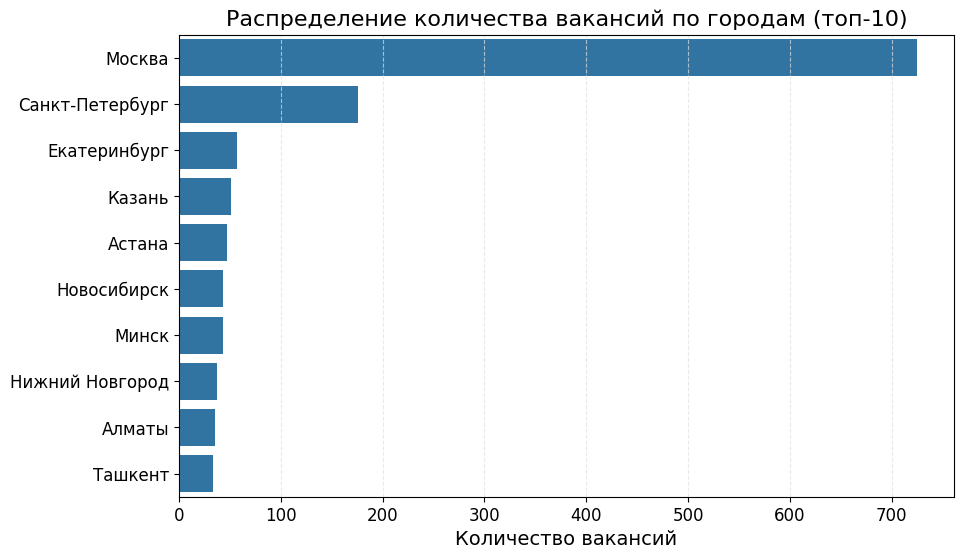

In [19]:
hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10)

sns.barplot(data=hh_df.groupby('city').agg(
    vac_in_city = ('vac_id','count')
    ).reset_index().sort_values(by='vac_in_city', ascending=False).head(10), y='city', x='vac_in_city', orient='h')

capture_figures('Распределение количества вакансий по городам (топ-10)', xlabel='Количество вакансий')
plt.show()

# Распределение скилов по вакансиям

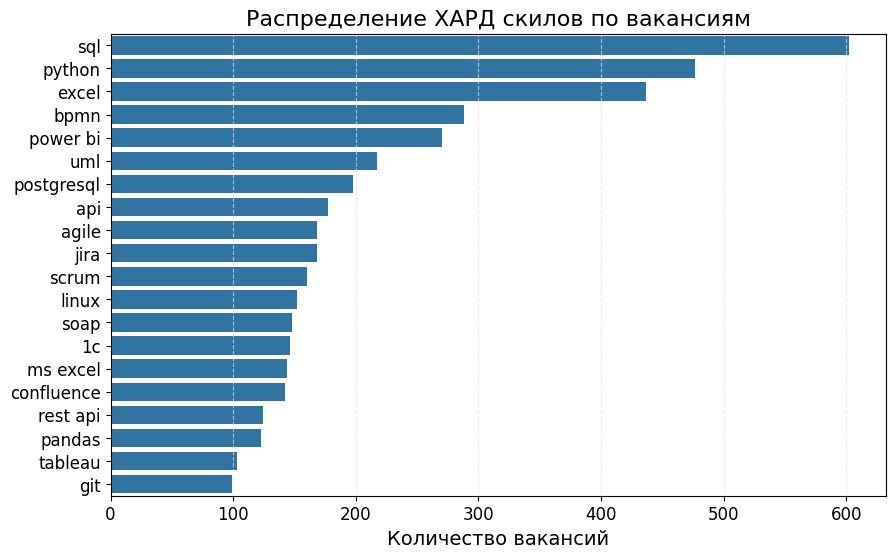

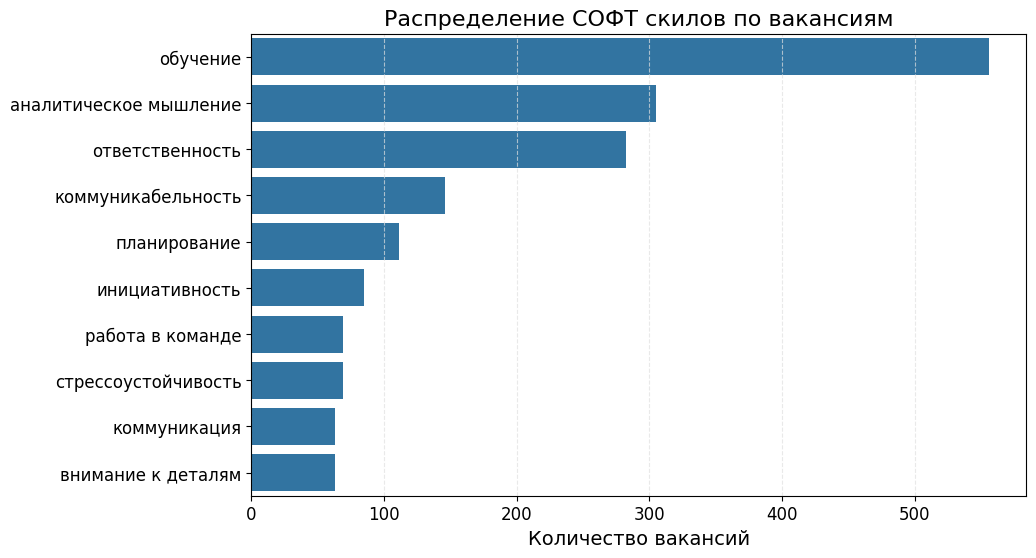

In [20]:
from utils.skills_extractor import SkillsExtractor

ske = SkillsExtractor()
soft_skills = ske.soft_skills
tech_skills = ske.tech_skills

hh_df_copy = hh_df.loc[:, ['vac_id','key_skills']]
hh_df_copy['key_skills_exploded'] = hh_df_copy.key_skills.str.split(';')
hh_df_copy = hh_df_copy.explode('key_skills_exploded', ignore_index=True)

skill_rating = hh_df.key_skills.str.split(';').explode().value_counts().reset_index().head(20)
hh_df_copy['hard_skills'] = hh_df_copy.key_skills_exploded.apply(lambda x: x.lower().strip() if any(skill  in x.lower().strip() for skill in tech_skills) else np.nan)
hh_df_copy['soft_skills'] = hh_df_copy.key_skills_exploded.apply(lambda x: x.lower().strip() if any(skill  in x.lower().strip() for skill in soft_skills) else np.nan)

hard_rating = hh_df_copy.groupby(['hard_skills']).agg(
    vac_cnt = ('vac_id','count')
).reset_index().sort_values(by='vac_cnt', ascending=False).head(20)

soft_rating = hh_df_copy.groupby(['soft_skills']).agg(
    vac_cnt = ('vac_id','count')
).reset_index().sort_values(by='vac_cnt', ascending=False).head(10)

sns.barplot(data=hard_rating, y='hard_skills', x='vac_cnt', orient='h')
capture_figures('Распределение ХАРД скилов по вакансиям', xlabel='Количество вакансий')
sns.barplot(data=soft_rating, y='soft_skills', x='vac_cnt', orient='h')
capture_figures('Распределение СОФТ скилов по вакансиям', xlabel='Количество вакансий')

# Стат. 

In [21]:
from scipy import stats as st
import pingouin as pg

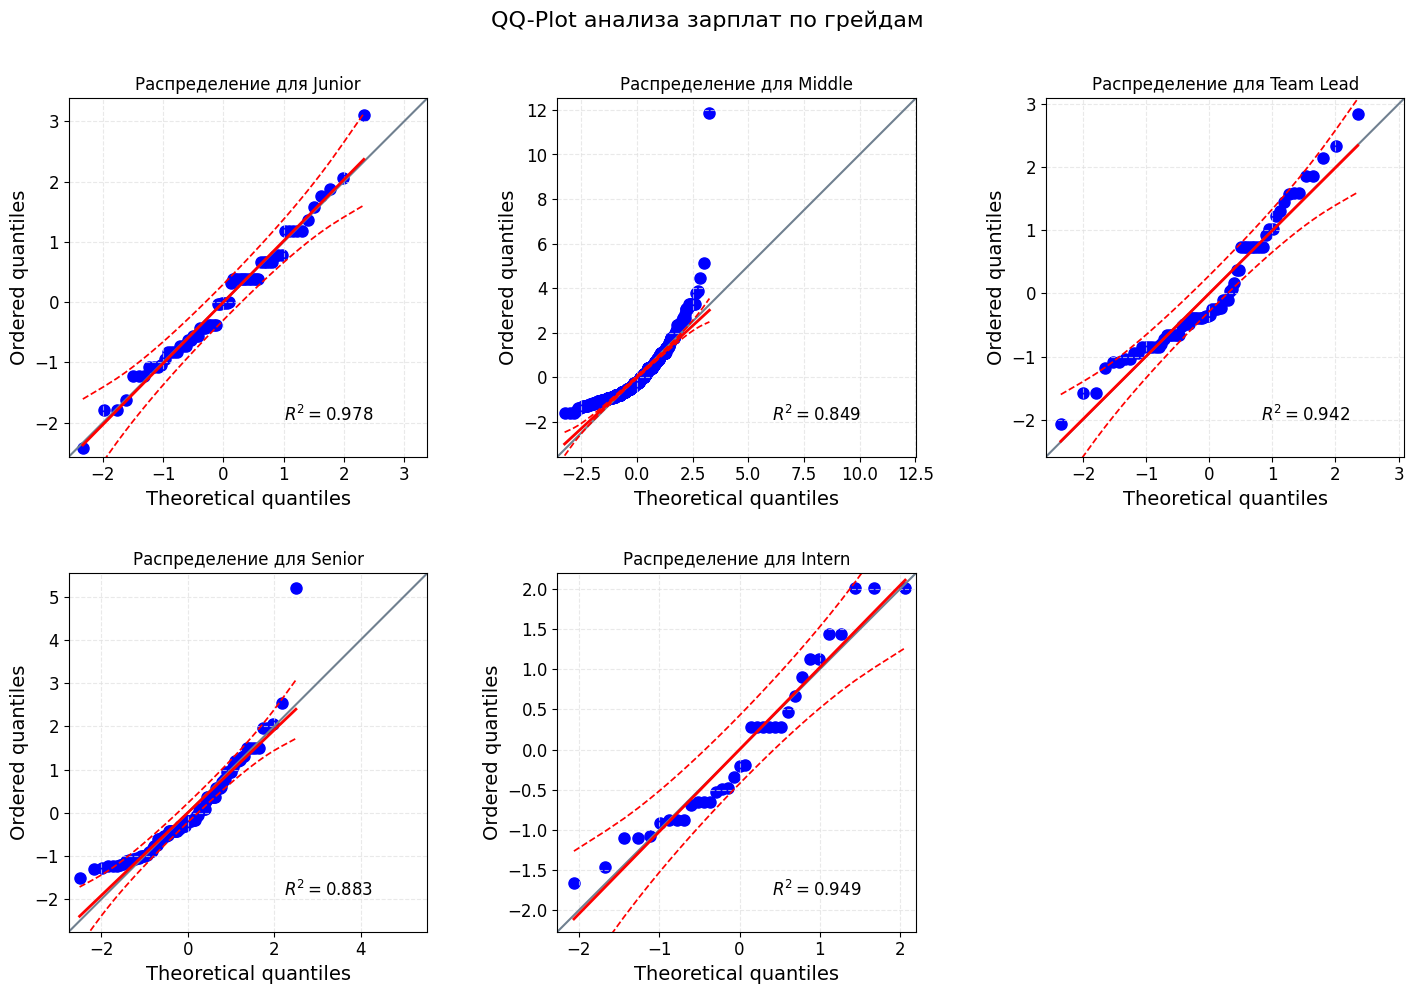

In [22]:
grade_list = hh_df.grade.unique().tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes_flat = axes.flatten()

for i, grade in enumerate(grade_list):
    data = hh_df.query(f'grade == "{grade}"').salary_from
    
    pg.qqplot(data, ax=axes_flat[i])
    axes_flat[i].set_title(f'Распределение для {grade}', fontsize=12)
    
    line = axes_flat[i].get_lines()[1]
    line.set_color('red')
    line.set_linewidth(2)

axes_flat[-1].axis('off')

plt.tight_layout(pad=3.0)
plt.suptitle('QQ-Plot анализа зарплат по грейдам', fontsize=16, y=1.02)
plt.show()

In [23]:
#тестирование на нормальное распределение ЗП между grade
pg.normality(data=hh_df, dv='salary_from', group='grade')

,W,pval,normal
grade,,,
Junior,0.982196,4.210987e-01,True
Middle,0.851599,3.038761e-32,False
Team Lead,0.941749,1.962252e-03,False
Senior,0.889838,1.374162e-07,False
Intern,0.938847,5.161593e-02,True


In [24]:
pg.kruskal(data=hh_df, dv='salary_from', between='grade')

,Source,ddof1,H,p-unc
Kruskal,grade,4,144.246004,3.478822e-30


Внутри зарплат разных грейдов наблюдаются стат.значимые различия p_value < 0.05